In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
import warnings

import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../../covid-19-data/us-states.csv')

In [6]:
def plot_hmm(state, metric='cases', dates_of_interest=None, hmm_plot=False, n_components=3):
    '''
    You can switch metric to 'deaths' if you want.
    
    '''
    df = pd.read_csv('../../covid-19-data/us-states.csv')
    state_df = df[df['state'] == state]
    state_df.drop(columns='state', inplace=True)
    state_df['date']= pd.to_datetime(state_df['date'])
    state_df.set_index('date', inplace=True)
    state_diff = state_df.diff()
    state_diff.dropna(inplace=True)
    X = state_diff[[metric]]


    plt.figure(figsize=(14, 4))

    
    if hmm_plot:
        
        model = hmm.GaussianHMM(n_components=n_components)
        model.fit(X)
        preds = model.predict(X) / 2
        plt.plot(X.index, preds, marker='', label='Regimes', color='#F59808')

    
    
    plt.plot(X/(X.max() - X.min()), label=f'Change in {metric.title()}', color='#810D0D')
    plt.xlabel('Date')
    plt.ylabel('Rate of Change')
    if dates_of_interest:
        for date in dates_of_interest:
            plt.axvline(x=date, label=date, color='black')
    plt.legend()
    plt.title(f'{state.title()} Daily COVID-19 Case Change')

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-4-8cd82994fd73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['date']= pd.to_datetime(state_df['date'])


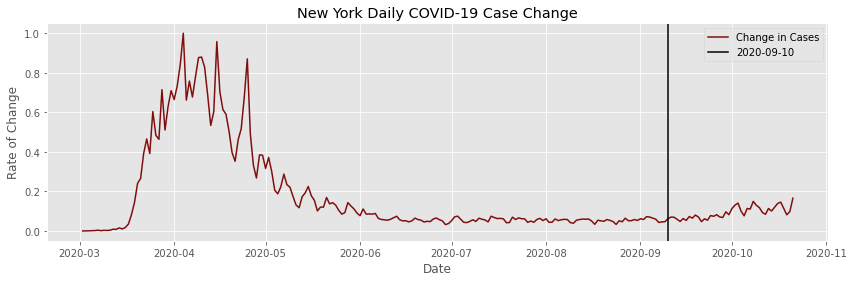

In [5]:
plot_hmm('New York', 'cases', ['2020-09-10'], False,1)

In [4]:
def plot_hmm_px(state, metric='cases', dates_of_interest=None, hmm_plot=False, n_components=3):
    '''
    You can switch metric to 'deaths' if you want.
    
    '''
    df = pd.read_csv('../../covid-19-data/us-states.csv')
    state_df = df[df['state'] == state]
    state_df.drop(columns='state', inplace=True)
    state_df['date']= pd.to_datetime(state_df['date'])
    state_df.set_index('date', inplace=True)
    state_diff = state_df.diff()
    state_diff.dropna(inplace=True)
    X = state_diff[[metric]]


    #plt.figure(figsize=(14, 4))
    
    fig = px.line(X/(X.max() - X.min()),title=f'{state.title()} Daily COVID-19 {metric.capitalize()} Change')
    
    
    if dates_of_interest:
        i=0
        j=0
        k=0
        for date in dates_of_interest:
            #fig.add_shape(type="line",x0 =date,x1=date,y0=0,y1=1.1)
            fig.add_scatter(x=(date,date),y=(0,1.1),line={'color': f'rgb({i},{j},{k})','width': 2,}, name='Superspreader')
            #plt.axvline(x=date, label=date, color='black')
    
    if hmm_plot:  
        model = hmm.GaussianHMM(n_components=n_components)
        model.fit(X)
        preds = model.predict(X) / 2
        fig.add_scatter(x=X.index, y=preds, name='Regime')
    
    return fig

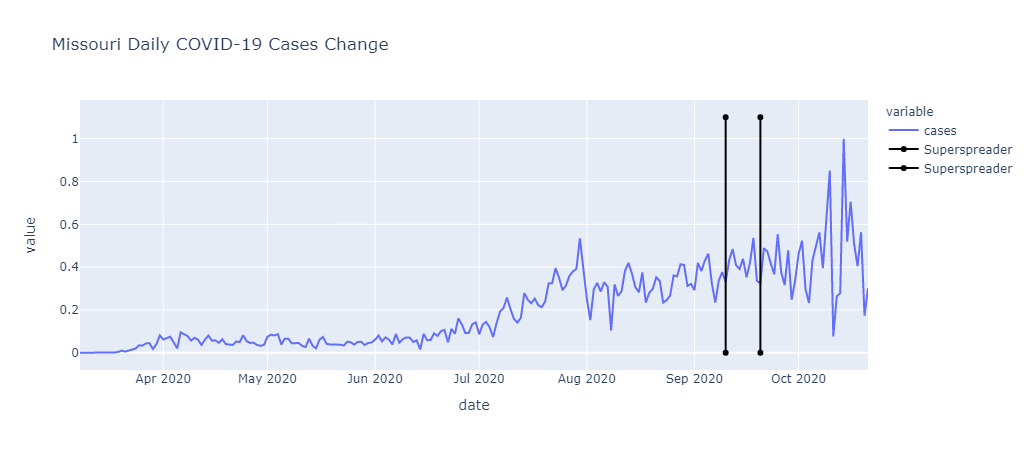

In [9]:
plot_hmm_px('Missouri', 'cases', ['2020-09-10','2020-09-20'], False,3)

In [10]:
state = 'Missouri'

In [12]:
state_df = df[df['state'] == state]
state_df.drop(columns='state', inplace=True)
state_df['date']= pd.to_datetime(state_df['date'])
state_df.set_index('date', inplace=True)
state_diff = state_df.diff()
state_diff.dropna(inplace=True)
X = state_diff[['cases']]

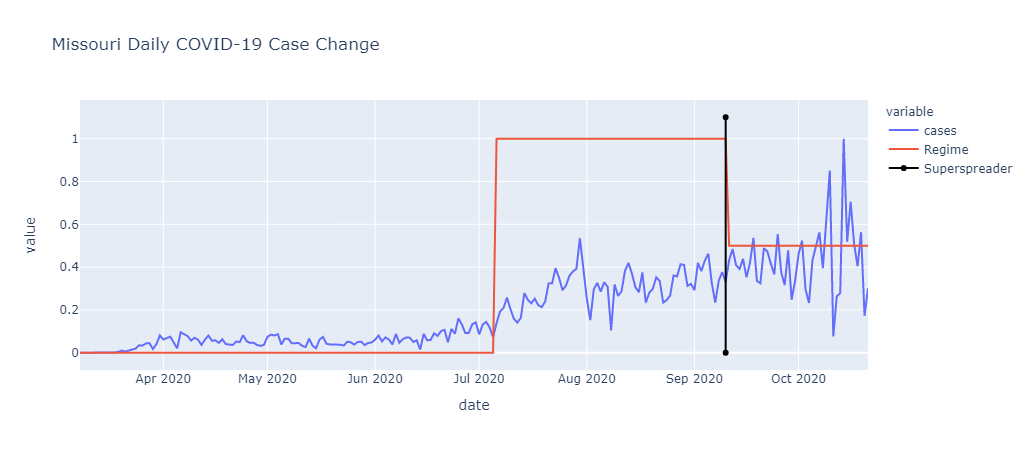

In [13]:
model = hmm.GaussianHMM(n_components=3)
model.fit(X)
preds = model.predict(X) / 2

fig = px.line(X/(X.max() - X.min()),title=f'{state.title()} Daily COVID-19 Case Change',labels='dude')
fig.add_scatter(x=X.index, y=preds, name='Regime',fillcolor='green')
#fig.add_shape(type="line",x0 ='2020-09-10',x1='2020-09-10',y0=0,y1=1.1,fillcolor='blue')
fig.add_scatter(x=('2020-09-10','2020-09-10'),y=(0,1.1),line={'color': 'rgb(0,0,0)','width': 2,}, name='Superspreader')

In [175]:
date_list = ['2020-09-10','2020-09-20']

In [178]:
pd.to_datetime(date_list[0])

Timestamp('2020-09-10 00:00:00')

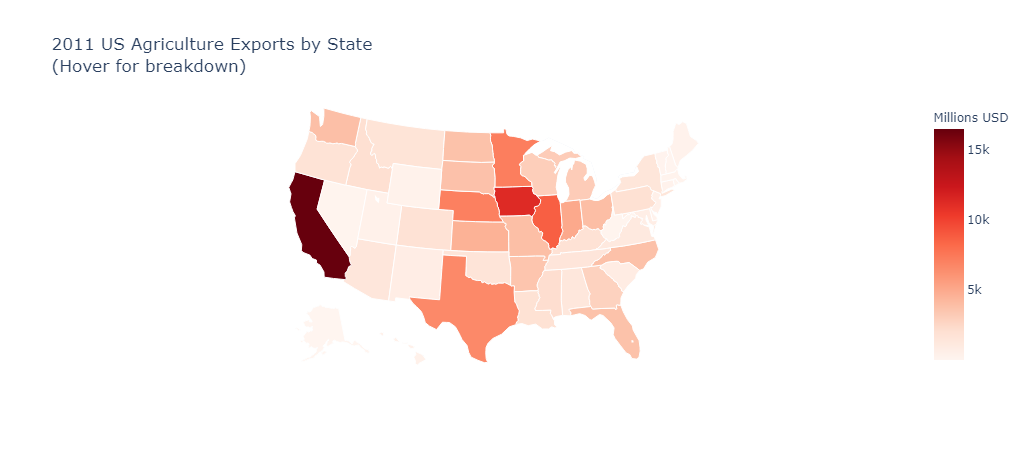

In [22]:
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [21]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.0,0.6,1.0,1.56,0.0,0.0,0.0,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.4,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Fruit...
